[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model. We will be using a different linear regression algorithm in the [Scikit-learn](https://scikit-learn.org/stable/) library to the course specification because it allows you to refine the model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import SGDRegressor
import pickle

####  Step 2
Open and parse the CSV file and store the data as variables array data objects.

In [3]:
training_data = pd.read_csv('2.4.1.testing_data.csv', delimiter=',')
x = np.array(training_data.iloc[:,1]).reshape(-1, 1)
y = np.array(training_data.iloc[:,0])

#### Step 3

Use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a SGDRegressor Machine Learning model class and store it in the `my_model` variable as an object, passing a range of parameters to configure the model. Then use the `fit` method from the `SGDRegressor` class to fit the model to the training data

In [4]:
# Create the model
my_model = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
# Fit the model to the data
my_model.fit(x, y)

SGDRegressor()

####  Step 4
Open and parse the test data CSV file and store the data as variable array data objects.

In [6]:
testing_data = pd.read_csv('2.4.1.testing_data.csv', delimiter=',')
x_test = np.array(testing_data.iloc[:,1]).reshape(-1, 1)
y_test = np.array(testing_data.iloc[:,0])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

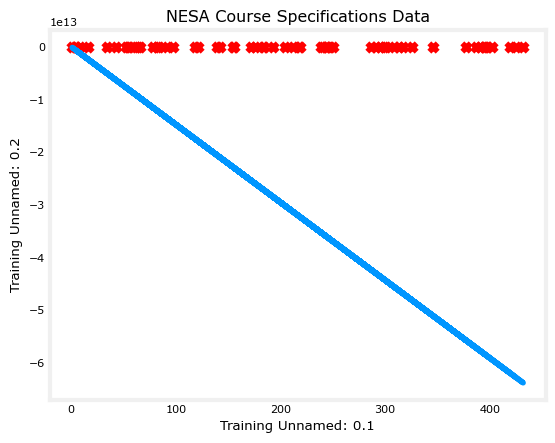

In [7]:
y_pred = my_model.predict(x)
plt.plot(x, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Training {training_data.columns[0]}')
plt.xlabel(f'Training {training_data.columns[1]}')
plt.show()

#### Step 6

Use the 'score' method of the `SGDRegressor` class to return a score based evaluation of the models accuracy or performance.

In [8]:
train_score = my_model.score(x, y)
test_score = my_model.score(x_test, y_test)
print(f'Training data score: {train_score}')
print(f'Training data score: {test_score}')

Training data score: -2.6548381563404375e+23
Training data score: -2.6548381563404375e+23


#### Step 7

Manually calculate and evaluate the 'cost' of the model using the test data.

In [9]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':my_model.predict(x_test),
    'Cost' : y_test - my_model.predict(x_test).round(2)
})
print(table)

    Unnamed: 0.2  Unnamed: 0.1  Predicted result          Cost
0            176            98     -2.599388e+13  2.599388e+13
1            387           207     -5.717039e+13  5.717039e+13
2             62            37     -9.149698e+12  9.149698e+12
3            425           229     -6.278511e+13  6.278511e+13
4            326           180     -4.815727e+13  4.815727e+13
5             82            47     -1.210482e+13  1.210482e+13
6            212           116     -3.131309e+13  3.131309e+13
7            295           163     -4.357684e+13  4.357684e+13
8             34            18     -5.012531e+12  5.012531e+12
9            245           135     -3.618904e+13  3.618904e+13
10            84            48     -1.240033e+13  1.240033e+13
11           155            87     -2.289100e+13  2.289100e+13
12           244           134     -3.604128e+13  3.604128e+13
13             5             4     -7.276080e+11  7.276080e+11
14           193           104     -2.850573e+13  2.850

#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [10]:
print(f'X Axis intercept: {my_model.intercept_}')
print(f'Coefficient: {my_model.coef_}')

X Axis intercept: [1.11718538e+10]
Coefficient: [-1.47755968e+11]


#### Step 9

Use the [SGDRegressor documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDRegressor.html) to fine tune your model and re-run steps 3, 4, 5, 6 & 7 to evaluate your adjustments.

#### Step 10

When you are happy with your final model save the model to file.

In [ ]:
# save the model to disk
filename = 'my_saved_model.sav'
pickle.dump(my_model, open(filename, 'wb'))